# SCRAPING

In [22]:
import pandas as pd
import numpy as np
from selenium import webdriver  
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchElementException  
from selenium.webdriver.common.keys import Keys  
from bs4 import BeautifulSoup as soup

# Initialize the WebDriver correctly
service = Service(ChromeDriverManager().install())  # Automatically downloads/upgrades ChromeDriver
browser = webdriver.Chrome(service=service)
# To run Chrome in head mode (this will open Chrome interface) 
#browser = webdriver.Chrome(executable_path=r"C:\Users\HP")  
#browser = webdriver.Chrome(executable_path=r"C:\chromedriver.exe")  
#browser = webdriver.Chrome()
#browser = webdriver.Edge()
browser.get("https://himalayas.app/jobs/data") 
# The driver.page_source will return the full page HTML code.
html_source = browser.page_source  
browser.quit()

In [24]:
page_soup = soup(html_source,'html.parser')
#page_soup

In [26]:
# Now let's see how many HTML product are present in this link:
containers= page_soup.findAll('article', {'class':'flex flex-shrink-0 cursor-pointer flex-col items-start gap-x-5 rounded-xl border border-gray-200 bg-white p-5 shadow-xs transition-shadow backface-hidden hover:shadow-xl md:flex-row md:p-6'})  
print(len(containers))

20


In [28]:

# Let get the url of the movie
url = containers[0].findAll("a", {"class": "text-xl font-medium text-gray-900 md:w-112 md:truncate"})[0]["href"]
url

'/companies/casechek/jobs/data-analyst-engineer'

In [38]:
import pandas as pd
import numpy as np
import time
from selenium import webdriver  
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys  
from selenium.common.exceptions import NoSuchElementException, TimeoutException, StaleElementReferenceException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup as soup

# Initialize the WebDriver
service = Service(ChromeDriverManager().install())
browser = webdriver.Chrome(service=service)

# Open Himalayas data jobs page
browser.get("https://himalayas.app/jobs/data") 

# List to store job URLs
job_url = []

# Specify the number of pages to scrape
pages_to_scrape = 250

# Loop through the specified number of pages
current_page = 1

while current_page <= pages_to_scrape:
    print(f"Scraping page {current_page} of {pages_to_scrape}...")
    
    time.sleep(7)  # Wait for the page to load
    
    html_source = browser.page_source  
    page_soup = soup(html_source, 'html.parser')
    
    containers = page_soup.findAll('article', {
        'class': 'flex flex-shrink-0 cursor-pointer flex-col items-start gap-x-5 rounded-xl border border-gray-200 bg-white p-5 shadow-xs transition-shadow backface-hidden hover:shadow-xl md:flex-row md:p-6'
    })

    # Extract URLs
    for container in containers:
        try:
            url = container.find("a", {
                "class": "text-xl font-medium text-gray-900 md:w-112 md:truncate"
            })["href"]
            full_url = f"https://himalayas.app{url}" if url.startswith("/") else url
            if full_url not in job_url:
                job_url.append(full_url)
        except (IndexError, TypeError, AttributeError):
            continue

    

    # Try clicking next page (optional, doesn't exist on Himalayas)
    try:
        next_button = WebDriverWait(browser, 10).until(
            EC.presence_of_element_located((By.XPATH, "//a[@class='flex flex-row-reverse h-full w-full items-center justify-center']"))
        )
        browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)
        browser.execute_script("arguments[0].click();", next_button)
        time.sleep(2)
        current_page += 1
    except StaleElementReferenceException:
        print(f"Stale Element Error on page {scroll_count}. Retrying...")
        continue
    except NoSuchElementException:
        print("No more pages to scrape.")
        break
    except TimeoutException:
        print(f"Timeout while loading page {scroll_count}.")
        break
    except Exception as e:
        print(f"Error while clicking next page: {e}")
        break

# Print collected job URLs
for url in job_url:
    print(url)

# Save to CSV
df = pd.DataFrame(job_url, columns=["job_URL"])
df.to_csv("job_urls.csv", index=False)

# Close browser
browser.quit()


Scraping page 1 of 250...
Scraping page 2 of 250...
Scraping page 3 of 250...
Scraping page 4 of 250...
Scraping page 5 of 250...
Scraping page 6 of 250...
Scraping page 7 of 250...
Scraping page 8 of 250...
Scraping page 9 of 250...
Scraping page 10 of 250...
Scraping page 11 of 250...
Scraping page 12 of 250...
Scraping page 13 of 250...
Scraping page 14 of 250...
Scraping page 15 of 250...
Scraping page 16 of 250...
Scraping page 17 of 250...
Scraping page 18 of 250...
Scraping page 19 of 250...
Scraping page 20 of 250...
Scraping page 21 of 250...
Scraping page 22 of 250...
Scraping page 23 of 250...
Scraping page 24 of 250...
Scraping page 25 of 250...
Scraping page 26 of 250...
Scraping page 27 of 250...
Scraping page 28 of 250...
Scraping page 29 of 250...
Scraping page 30 of 250...
Scraping page 31 of 250...
Scraping page 32 of 250...
Scraping page 33 of 250...
Scraping page 34 of 250...
Scraping page 35 of 250...
Scraping page 36 of 250...
Scraping page 37 of 250...
Scraping p

In [ ]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import TimeoutException, WebDriverException
from bs4 import BeautifulSoup
import os

# Load URLs
url_df = pd.read_csv("job_urls.csv")
job_url = url_df["job_URL"].dropna().tolist()

# Resume scraping if partially done
already_scraped = []
if os.path.exists("scraped_jobs.csv"):
    already_scraped_df = pd.read_csv("scraped_jobs.csv")
    already_scraped = already_scraped_df["Job Title"].tolist()
    print(f"Resuming from {len(already_scraped)} scraped jobs...")

# Setup browser
options = webdriver.ChromeOptions()
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
# options.add_argument("--headless")  # Uncomment for background mode
service = Service(ChromeDriverManager().install())
browser = webdriver.Chrome(service=service, options=options)

# Data holders
job_titles, company_names, locations, skillsets, posted_dates, failed_urls = [], [], [], [], [], []

# Retry settings
MAX_RETRIES = 2

# Scrape
for index, url in enumerate(job_url[len(already_scraped):]):
    print(f"Scraping {index + 1 + len(already_scraped)}/{len(job_url)}: {url}")
    attempt = 0
    while attempt <= MAX_RETRIES:
        try:
            browser.set_page_load_timeout(30)
            browser.get(url)
            WebDriverWait(browser, 15).until(
                EC.presence_of_element_located((By.TAG_NAME, "body"))
            )
            soup = BeautifulSoup(browser.page_source, "html.parser")

            # Job Title
            try:
                job_title = soup.find("h1", {
                    "class": "mb-3 w-max max-w-5xl text-3xl font-medium text-gray-900 md:mb-5 md:text-5xl"
                }).text.strip()
            except:
                job_title = "No job name found"

            # Company Name
            try:
                company_name = soup.find("a", {
                    "class": "font-medium text-gray-700 md:text-lg"
                }).text.strip()
            except:
                company_name = "No company name found"

            # Location
            try:
                location = soup.find("a", {
                    "class": "inline-flex items-center border rounded-md font-medium w-max h-max border-gray-200 rounded-l-2xl text-xs pr-2 pl-0.75 py-0.5 bg-white hover:bg-gray-50"
                }).text.strip()
            except:
                location = "No location found"

            # Skills (improved dynamic targeting)
            try:
                skills = "No skills found"
                all_blocks = soup.find_all("div", class_="flex flex-col gap-y-3")
                for block in all_blocks:
                    heading = block.find("h3")
                    if heading and heading.text.strip().lower() == "skills":
                        skill_section = block.find("div", class_="flex flex-wrap gap-2")
                        skill_links = skill_section.find_all("a") if skill_section else []
                        skills = ", ".join([
                            s.find("span").text.strip()
                            for s in skill_links if s.find("span")
                        ]) if skill_links else "No skills found"
                        break
            except:
                skills = "No skills found"

            # Posted Date
            try:
                dates_found = soup.find_all("time", {"class": "text-gray-900"})
                posted_date = dates_found[1].text.strip() if len(dates_found) >= 2 else "No second date found"
            except:
                posted_date = "No date found"

            # Save current
            job_titles.append(job_title)
            company_names.append(company_name)
            locations.append(location)
            skillsets.append(skills)
            posted_dates.append(posted_date)
            print(f"Done: {job_title}")
            break

        except Exception as e:
            attempt += 1
            if attempt > MAX_RETRIES:
                print(f" Failed after {MAX_RETRIES + 1} attempts: {url} | {e}")
                failed_urls.append(url)
                job_titles.append("Error")
                company_names.append("Error")
                locations.append("Error")
                skillsets.append("Error")
                posted_dates.append("Error")
            else:
                print(f" Retry {attempt} for {url}")
                time.sleep(1)

    time.sleep(1)  # Short delay, faster than 2s

    # Save every 100 entries as backup
    if len(job_titles) % 100 == 0:
        pd.DataFrame({
            "Job Title": job_titles,
            "Company": company_names,
            "Location": locations,
            "Skills": skillsets,
            "Posted Date": posted_dates
        }).to_csv("scraped_jobs.csv", index=False)
        print("Auto-saved checkpoint")

# Final Save
df = pd.DataFrame({
    "Job Title": job_titles,
    "Company": company_names,
    "Location": locations,
    "Skills": skillsets,
    "Posted Date": posted_dates
})
df.to_csv("scraped_jobs.csv", index=False)
print("Final save to 'scraped_jobs.csv'")

if failed_urls:
    pd.DataFrame(failed_urls, columns=["Failed URLs"]).to_csv("failed_job_urls.csv", index=False)
    print("Failed URLs saved to 'failed_job_urls.csv'")

browser.quit()
print("Scraping complete.")


# CLEANING

In [31]:
import pandas as pd

In [33]:
jobs = pd.read_csv('scraped_jobs.csv')
jobs.head(5)

,Job Title,Company,Location,Skills,Posted Date
0,Data Analytics Engineer,Teya,Czechia,"Data Warehouse, ETL, Data Integrity, Data Mode...","Aug 05, 2025"
1,Data Architect (Trading),Keyrock,Argentina,"Data Architecture, Data Engineering, ETL, Data...","Aug 05, 2025"
2,Principal data scientist,Elevation Capital,India,"AI, LLMs), ML AI, SQL, Data Analysis, Python, ...","Aug 05, 2025"
3,Data Analyst Engineer,Casechek,United States,"Data Analytics, Data Pipelines, Data Modeling,...","Aug 04, 2025"
4,Senior Data Engineer | Partners Content,Gympass,Brazil,"Data Engineering, Data Collection, Data Proces...","Aug 04, 2025"


In [35]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Job Title    3100 non-null   object
 1   Company      3100 non-null   object
 2   Location     3100 non-null   object
 3   Skills       3100 non-null   object
 4   Posted Date  3100 non-null   object
dtypes: object(5)
memory usage: 121.2+ KB


In [37]:
invalid_values = [
    "No job name found",
    "No company name found",
    "No location found",
    "No skills found",
    "No second date found",
    "Error"]
jobs_cleaned = jobs[~jobs.isin(invalid_values).any(axis=1)]
jobs_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2210 entries, 0 to 2413
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Job Title    2210 non-null   object
 1   Company      2210 non-null   object
 2   Location     2210 non-null   object
 3   Skills       2210 non-null   object
 4   Posted Date  2210 non-null   object
dtypes: object(5)
memory usage: 103.6+ KB


In [39]:
jobs_cleaned = jobs_cleaned.drop_duplicates()
jobs_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2210 entries, 0 to 2413
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Job Title    2210 non-null   object
 1   Company      2210 non-null   object
 2   Location     2210 non-null   object
 3   Skills       2210 non-null   object
 4   Posted Date  2210 non-null   object
dtypes: object(5)
memory usage: 103.6+ KB


In [41]:
jobs_cleaned.to_csv("cleaned_scraped_jobs.csv", index=False)
print("✅ Cleaned file saved as 'cleaned_scraped_jobs.csv' ")

✅ Cleaned file saved as 'cleaned_scraped_jobs.csv' 


In [43]:
#TO make your plots display within the notebook instead of opening a new window to display the chart
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

#### Most in-demand roles

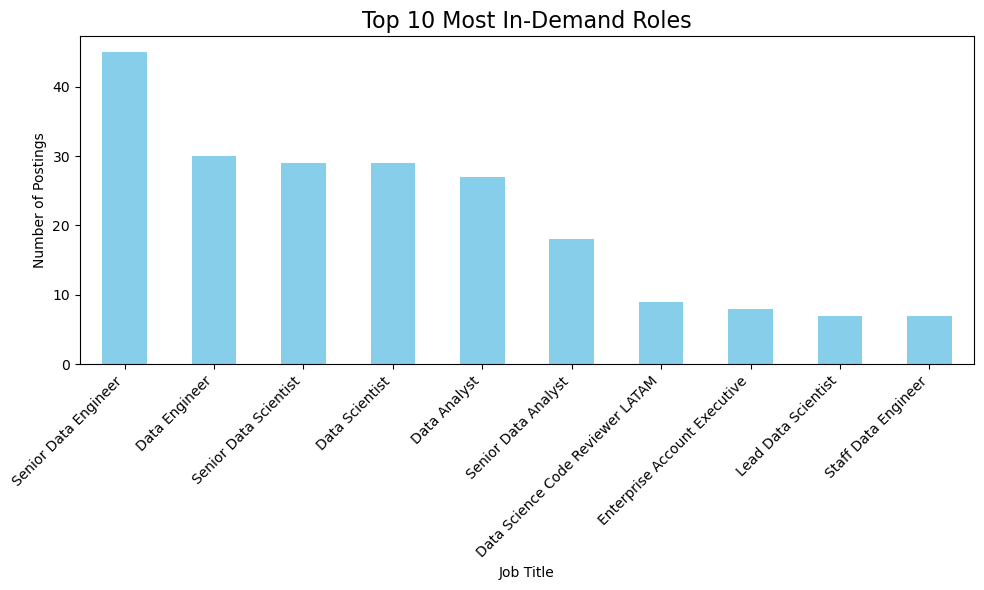

In [48]:
top_roles = jobs_cleaned["Job Title"].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_roles.plot(kind="bar", color="skyblue")
plt.title("Top 10 Most In-Demand Roles", fontsize=16)
plt.xlabel("Job Title")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Most frequent skills overall

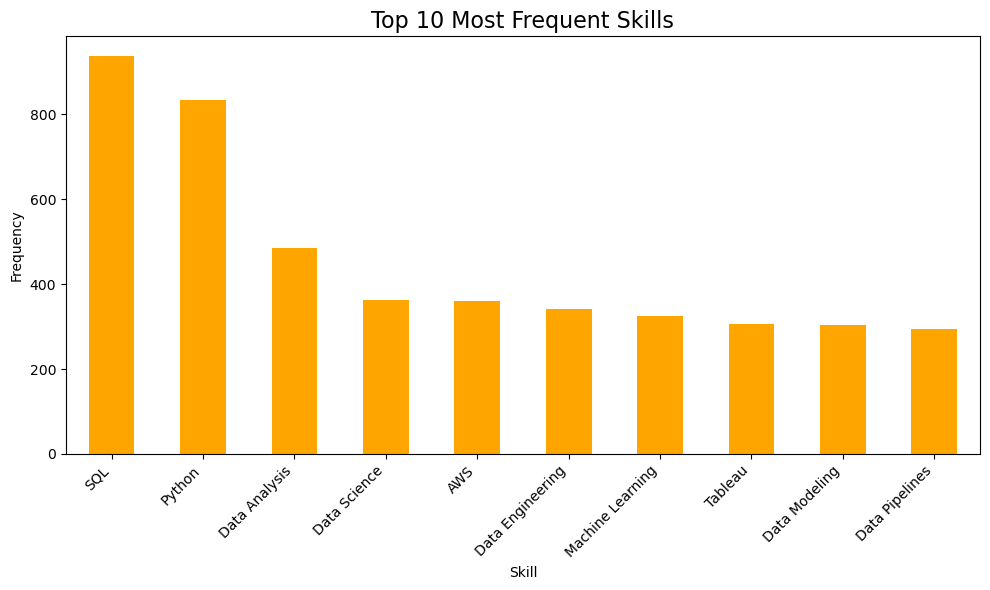

In [54]:
# Split skills column (comma separated) into single skills
all_skills = jobs_cleaned["Skills"].dropna().str.split(", ")
all_skills = all_skills.explode().str.strip()

top_skills = all_skills.value_counts().head(10)

plt.figure(figsize=(10, 6))
top_skills.plot(kind="bar", color="orange")
plt.title("Top 10 Most Frequent Skills", fontsize=16)
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Most frequent skills by city

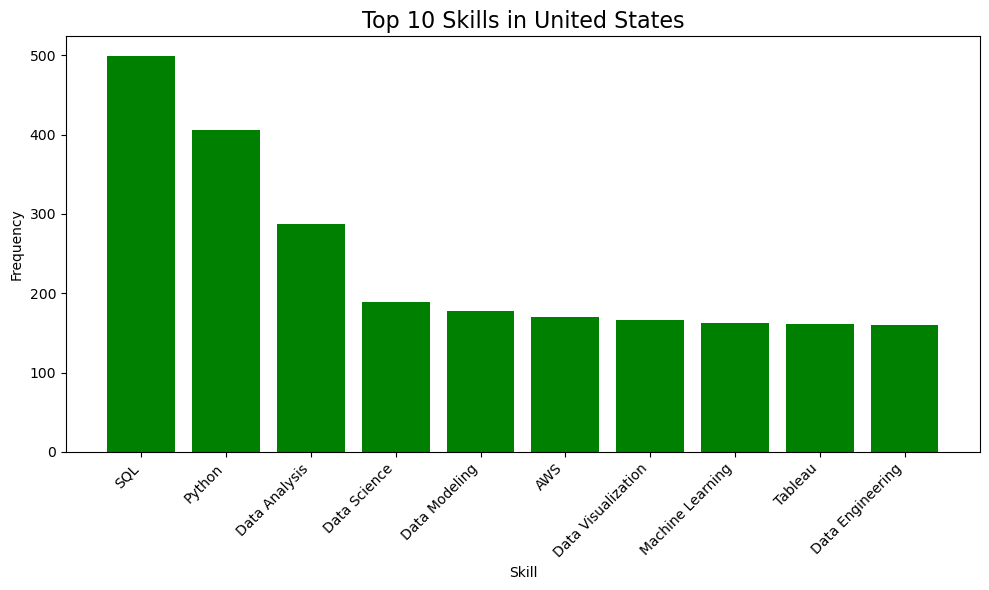

In [67]:
skills_by_city = (
    jobs_cleaned.assign(Skill=jobs_cleaned["Skills"].str.split(", "))
      .explode("Skill")
      .groupby(["Location", "Skill"])
      .size()
      .reset_index(name="Count")
)
# Pick a city to visualize (e.g., United States)
city_name = "United States"
city_skills = skills_by_city[skills_by_city["Location"].str.contains(city_name, case=False)]
top_city_skills = city_skills.sort_values("Count", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_city_skills["Skill"], top_city_skills["Count"], color="green")
plt.title(f"Top 10 Skills in {city_name}", fontsize=16)
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()